In [1]:
#!/usr/bin/python
# The first cell loads the data and creates new feature
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','bonus'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop("TOTAL", 0)

### Task 3: Create new feature(s)
# poi_mutual_correspondence
# Reflects if a person is sending a similar number of emails to POIs as they
# receive from POIs, and multiplies that proportion by the number of email
# sent to POIs.  The more emails a person sends to POIs when they are receiving
# a similar number of responses could indicate a common interest.
for person in data_dict:
    if data_dict[person]['from_poi_to_this_person'] != 'NaN':
        if data_dict[person]['from_poi_to_this_person'] == 0:
            data_dict[person]['poi_mutual_correspondence'] = 0
        else:
            if data_dict[person]['from_this_person_to_poi'] < \
               data_dict[person]['from_poi_to_this_person']:
                data_dict[person]['poi_mutual_correspondence'] =  \
                  round(data_dict[person]['from_this_person_to_poi']* \
                    (float(data_dict[person]['from_this_person_to_poi'])/ \
                     data_dict[person]['from_poi_to_this_person']), 2)
            else:
                data_dict[person]['poi_mutual_correspondence'] = \
                  round(data_dict[person]['from_this_person_to_poi']* \
                    (float(data_dict[person]['from_poi_to_this_person'])/ \
                     data_dict[person]['from_this_person_to_poi']), 2)
    else:
        data_dict[person]['poi_mutual_correspondence'] = 'NaN'

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn import tree
clf = tree.DecisionTreeClassifier()

### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


C:\Users\Home\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The following cell attempts to use SelectKBest to select features.  The cell after that then tunes several combinations of features based on the SelectKResults.

I don't understand why SelectKBest is selecting fetures with zero scores.

features_list= ['to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'poi_mutual_correspondence', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options'] 20

The following list shows (Feature selected?, Feature, pvalue, score)
[(False, 'to_messages', 1.3946496742316879e-20, 14.458816043889673), (False, 'deferral_payments', 0.32748634932858972, 1.1193460604415526), (False, 'expenses', 0.0012967358070060269, 2.1402616279069768), (False, 'deferred_income', 1.6233781183842304e-13, 7.4001367830234264), (False, 'poi_mutual_correspondence', 0.0, inf), (False, 'restricted_stock_deferred', 1.0089972268344367e-61, 445.88684631339737), (False, 'shared_receipt_with_poi', 0.0, inf), (True, 'loan_advances', 0.0, inf), (True, 'from_messages', 0.0, i

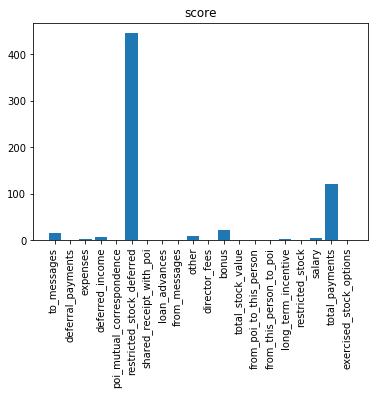

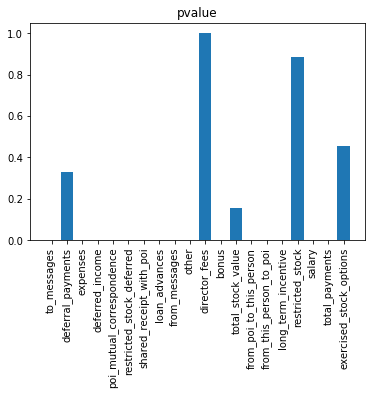

In [70]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
#https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
#https://stackoverflow.com/questions/21471513/sklearn-selectkbest-which-variables-were-chosen

# create feature list
features_list = []
for feature in data_dict['YEAGER F SCOTT']:
    features_list.append(feature)
features_list.remove('email_address') # not a usable feature for the algorithm
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
features_list.remove('poi') # don't want SelectKBest to evaluate the poi feature
print "features_list=",features_list, len(features_list)

# Perform feature selection.  Select best 4 of 20 features
selector = SelectKBest(f_classif, k=4)
selector.fit(features, labels)

pvalues =  selector.pvalues_ 
scores = selector.scores_ #-np.log10(selector.scores_)
print
print "The following list shows (Feature selected?, Feature, pvalue, score)"
print zip(selector.get_support(), features_list, pvalues, scores)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(features_list)), scores)
plt.xticks(range(len(features_list)), features_list, rotation='vertical')
plt.title("score")
plt.show()
plt.bar(range(len(features_list)), pvalues)
plt.xticks(range(len(features_list)), features_list, rotation='vertical')
plt.title("pvalue")
plt.show()

In [67]:
from tuneDT import maximize_parameter 

#for each feature list, tune for best precision

#try combinations of several features

print "---- Top 3 scores ----" # based on first graph
features_list = ['poi','restricted_stock_deferred', 'total_payments', 'bonus']
best_parm, best_precision = maximize_parameter(my_dataset, features_list)
print "Tuned Decision Tree for features %s uses min_samples_split=%i" % \
       (features_list, best_parm)
clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
clf.fit(features, labels)
importances = clf.feature_importances_
print "Feature Importances: %s (%0.4f), %s (%0.4f), %s (%0.4f)" % \
    (features_list[1], importances[0], features_list[2], importances[1], features_list[3], importances[2])
test_classifier(clf, my_dataset, features_list)

print "---- Top 4 pvalues ----" # based on second graph
features_list = ['poi', 'director_fees','restricted_stock','exercised_stock_options','deferral_payments']
best_parm, best_precision = maximize_parameter(my_dataset, features_list)
print "Tuned Decision Tree for features %s uses min_samples_split=%i" % \
       (features_list, best_parm)
clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
clf.fit(features, labels)
importances = clf.feature_importances_
print "Feature Importances: %s (%0.4f), %s (%0.4f), %s (%0.4f), %s (%0.4f)" % \
    (features_list[1], importances[0], features_list[2], importances[1], features_list[3], importances[2], features_list[4], importances[3])
test_classifier(clf, my_dataset, features_list)

print "---- K=4 choices ----" # based on the 4 features selected by SelectKBest
features_list = ['poi', 'loan_advances','from_messages','from_poi_to_this_person','from_this_person_to_poi']
best_parm, best_precision = maximize_parameter(my_dataset, features_list)
print "Tuned Decision Tree for features %s uses min_samples_split=%i" % \
       (features_list, best_parm)
clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
clf.fit(features, labels)
importances = clf.feature_importances_
print "Feature Importances: %s (%0.4f), %s (%0.4f), %s (%0.4f), %s (%0.4f)" % \
    (features_list[1], importances[0], features_list[2], importances[1], features_list[3], importances[2], features_list[4], importances[3])
test_classifier(clf, my_dataset, features_list)

# next two tunes are from the initial project submission

features_list = ['poi','bonus','poi_mutual_correspondence']
best_parm, best_precision = maximize_parameter(my_dataset, features_list)
print "Tuned Decision Tree for features %s uses min_samples_split=%i" % \
       (features_list, best_parm)
clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
clf.fit(features, labels)
importances = clf.feature_importances_
print "Feature Importances: %s (%0.4f), %s (%0.4f)" % (features_list[1], \
                       importances[0], features_list[2], importances[1])
test_classifier(clf, my_dataset, features_list)

best_parm_previous = best_parm
best_precision_previous = best_precision
features_list_previous = features_list

features_list = ['poi','bonus']
best_parm, best_precision = maximize_parameter(my_dataset, features_list)
print "Tuned Decision Tree for features %s uses min_samples_split=%i" % \
       (features_list, best_parm)
clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
test_classifier(clf, my_dataset, features_list)


print
if best_precision > best_precision_previous:
    print "Keeping feature list %s with min_samples_split=%i" % \
           (features_list, best_parm)
    clf = tree.DecisionTreeClassifier(min_samples_split=best_parm)
else:
    print "Keeping feature list %s with min_samples_split=%i" % \
           (features_list_previous, best_parm_previous)
    clf = tree.DecisionTreeClassifier(min_samples_split=best_parm_previous)
    features_list = features_list_previous

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
dump_classifier_and_data(clf, my_dataset, features_list)


---- Top three scores ----
Tuned Decision Tree for features ['poi', 'restricted_stock_deferred', 'total_payments', 'bonus'] uses min_samples_split=15
Feature Importances: restricted_stock_deferred (0.0000), total_payments (0.6655), bonus (0.3345)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.82154	Precision: 0.34158	Recall: 0.17250	F1: 0.22924	F2: 0.19145
	Total predictions: 13000	True positives:  345	False positives:  665	False negatives: 1655	True negatives: 10335

---- Top 4 pvalues ----
Tuned Decision Tree for features ['poi', 'director_fees', 'restricted_stock', 'exercised_stock_options', 'deferral_payments'] uses min_samples_split=20
Feature Importances: director_fees